### 학습을 잘하는 법 : 학습데이터가 많고 골고루 있어야 가중치를 잘 찾아서 테스트 성능이 좋아진다. but 데이터 확보가 어려우므로 결국은 빅데이터 확보가 필수
#### - 일반화 : 학습성능과 테스트성능이 유사하게 성능이 좋은 경우(과대/과소적합이 없는 경우)
#### - 데이터분포의 중요성 : 데이터를 인위적으로 생성(오버샘플링)하여 학습성능을 높임 - 데이터분포를 확인하여 비워있는 구간이 있는지 확인하여 over-sampling으로 데이터를 생성하고 학습수행
#### - 규제화 : 내가 원하는 모습으로 학습을 하기 위해 제어하는 것

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import korean_language

### 손실함수 : 회귀는 MSE(오차), 분류는 Cross-Entopy
#### 성능지표 : 회귀는 결정계수, 분류는 정확도,정밀도, 재현율 등
#### - 분류에서 정확도를 기본 손실함수로 사용할수 있다
#### - categoty가 불균형시 : Cross-Entopy를 사용하고 성능지표로 성능을 확인
#### - Cross Entropy Loss은 머신 러닝 분류 모델의 발견된 확률 분포와 예측 분포 사이의 차이를 측정. 
#### - 예측에 대해 가능한 모든 값이 저장되므로, 예를 들어, 동전 던지기에서 특정 값(odd)을 찾는 경우 해당 정보가 0.5와 0.5(앞면과 뒷면)에 저장

---
### 찾고자 하는 종속변수의 카테고리 데이터분포가 고루지 못한 경우(예: 암환자, 범죄자 등) 
#### 재현율(recall) : 관심대상을 얼마나 잘 찾았는지 보는 지표로 암환자 10명중 암환자를 6명, 정상을 4명으로 찾는 경우 60%
#### 정밀도(precision) : 암환자로 예측한 자료에서 실제 암환자가 몇명인지 찾은정도로 모델의 신뢰도를 줌
#### F1 : 재현율과 정밀도는 동시에 좋을 수 없으므로 이들을 조화평균( 두개의 값이 모두 높으면 평균값이 높고 한쪽이 낮으면 평균값이 낮아짐)으로 계산한 성능지표 
---
#### 정적성능 : confusion matrix
#### 동적성능 :최종 분류결과를 보는것이 아니라 분류한 순서를 평가로 AUC, ROC가 있음
#### 예측점수를 내림차순으로 정렬해서 분류된 예측값과 실제값이 제대로 일치한 비율로 
#### - ROC커브는 0,0으로 시작하여 정답을 맞추면 Y축으로 한칸가고 틀리면 X축으로 한칸이동함 - 잘 맞춘경우 Y축이 높고 틀린게 많으면 X축으로 선이 그려짐
#### - ROC커브는 예측정수를 정렬한 이후 그래프를 그림
#### - 참고사이트 : https://m.blog.naver.com/sharp_kiss/221599009671
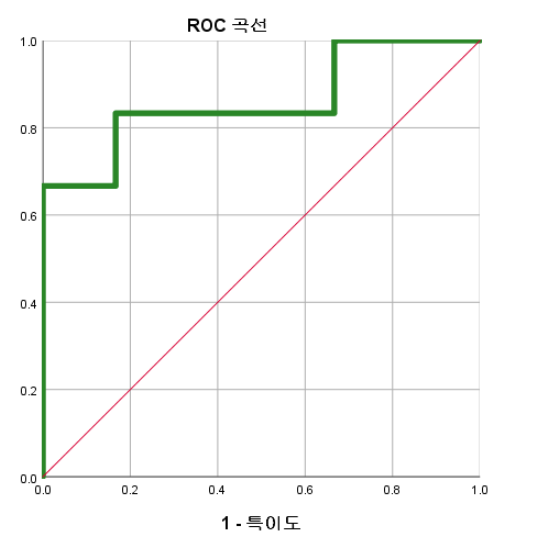
#### - AUC : ROC는 그래프로 성능을 확인하는데 AUC는 ROC그래프의 면적을 숫자로 계산한것으로 1에 가까울수록 성능이 좋음
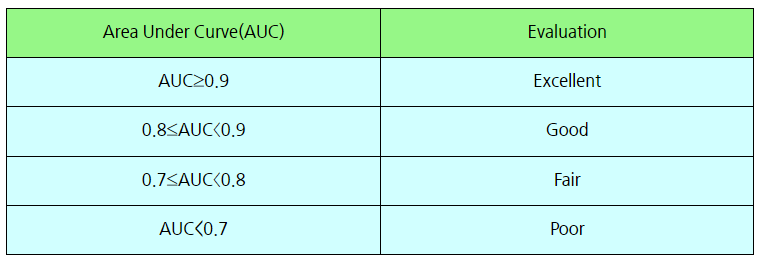

### 성별예측 
#### - y_score가 8위까지 여성이라고 y_pred가 가정한경우 real데이터와 분류성능을 confusion, classification_report, Roc curve로 확인하는 예제

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
y_score = np.linspace(99,60,20).round(1)
y_score

array([99. , 96.9, 94.9, 92.8, 90.8, 88.7, 86.7, 84.6, 82.6, 80.5, 78.5,
       76.4, 74.4, 72.3, 70.3, 68.2, 66.2, 64.1, 62.1, 60. ])

In [9]:
#len([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0])
y_pred = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]

In [14]:
y_pred.count(1),y_pred.count(0)

(8, 12)

In [15]:
y_test = [1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]
y_test.count(1),y_test.count(0)

(10, 10)

In [17]:
confusion_matrix(y_test, y_test)

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [19]:
confusion_matrix(y_test, y_pred)

array([[8, 2],
       [4, 6]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



In [23]:
result = pd.DataFrame(list(zip(y_score,y_pred,y_test)),columns=['score','predict','real'])

In [24]:
result['corect'] = result['predict'] == result['real']

In [25]:
result

,score,predict,real,corect
0,99.0,1,1,True
1,96.9,1,1,True
2,94.9,1,0,False
3,92.8,1,1,True
4,90.8,1,0,False
5,88.7,1,1,True
6,86.7,1,1,True
7,84.6,1,1,True
8,82.6,0,0,True
9,80.5,0,0,True


In [26]:
fpr = dict()
tpr = dict()
roc_auc =  dict()

### fpr, tpr, 안쓰는변수 = roc_curve(y_test, y_score) 

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_score)

In [36]:
roc_auc = auc(fpr, tpr)
roc_auc

0.73

In [37]:
fpr

array([0. , 0. , 0. , 0.1, 0.1, 0.2, 0.2, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6,
       1. ])

In [35]:
pd.DataFrame(list(zip(fpr,tpr)), columns =['fpr','tpr'])

,fpr,tpr
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.1,0.2
4,0.1,0.3
5,0.2,0.3
6,0.2,0.6
7,0.4,0.6
8,0.4,0.7
9,0.5,0.7


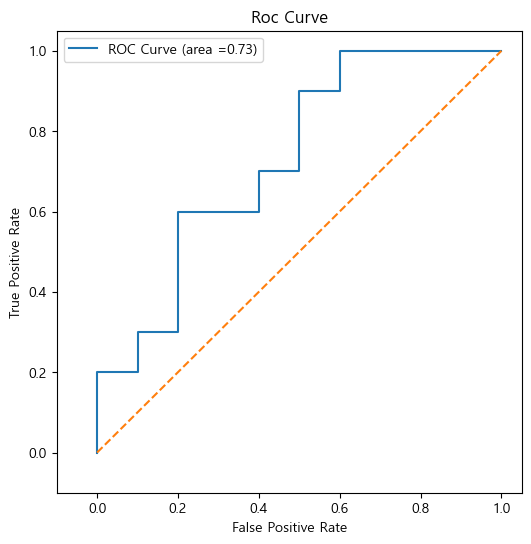

In [50]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC Curve (area =%.2f)'% roc_auc)
plt.plot([0,1],[0,1], linestyle ='--')
plt.ylim([-0.1, 1.05])
plt.xlim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend()
plt.show()

### 포도주 품질 성능 분류
#### - 예제 : https://www.kaggle.com/code/vishalyo990/prediction-of-quality-of-wine/notebook

In [53]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [62]:
wine = pd.read_csv('./winequality-red.csv')
wine.shape

(1599, 12)

In [64]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
wine['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

### pd.cut범위 나누기(데이터, 범위값(2.5 ~ 6.5, 6.5 ~ 8.5), 라벨값)

In [57]:
my_bins = (2.5, 6.5, 8.5)
groups = [0,1]

In [66]:
wine['class'] = pd.cut(wine['quality'], bins = my_bins, labels=groups)

In [67]:
wine['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

In [69]:
x = wine.drop(['quality','class'], axis=1)
x.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [70]:
y = wine['class']

In [77]:
y = np.array(y)

In [71]:
sc = StandardScaler()
std_x = sc.fit_transform(x)

In [83]:
std_x[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [80]:
x.shape, y.shape

((1599, 11), (1599,))

In [84]:
train_x, test_x, train_y, test_y = train_test_split(std_x, y, test_size=0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1279, 11), (320, 11), (1279,), (320,))

### 모델학습 

In [85]:
sgd = SGDClassifier()

In [86]:
sgd.fit(train_x, train_y)
sgd.score(test_x,test_y)

0.878125

In [87]:
dt = tree.DecisionTreeClassifier()

In [88]:
dt.fit(train_x, train_y)
dt.score(test_x,test_y)

0.884375

In [89]:
rf = RandomForestClassifier()

In [90]:
rf.fit(train_x, train_y)
rf.score(test_x,test_y)

0.934375

In [91]:
svc = SVC()

In [92]:
svc.fit(train_x, train_y)
svc.score(test_x,test_y)

0.8875

In [93]:
lg = LogisticRegression()

In [94]:
lg.fit(train_x, train_y)
lg.score(test_x,test_y)

0.8875

### 성능평가 

In [96]:
sgd_pred_y = sgd.predict(test_x)
confusion_matrix(test_y, sgd_pred_y)

array([[270,   9],
       [ 30,  11]], dtype=int64)

In [97]:
dt_pred_y = dt.predict(test_x)
confusion_matrix(test_y, dt_pred_y)

array([[256,  23],
       [ 14,  27]], dtype=int64)

In [98]:
rf_pred_y = rf.predict(test_x)
confusion_matrix(test_y, rf_pred_y)

array([[275,   4],
       [ 17,  24]], dtype=int64)

In [100]:
svc_pred_y = svc.predict(test_x)
confusion_matrix(test_y, svc_pred_y)

array([[273,   6],
       [ 30,  11]], dtype=int64)

In [101]:
lg_pred_y = lg.predict(test_x)
confusion_matrix(test_y, lg_pred_y)

array([[272,   7],
       [ 29,  12]], dtype=int64)

### ROC Curve 
#### - 모델명.decision_function(테스트데이터) : 예측확률값을 반환함.  모델.predict_proba(테스트데이터)와 동일하며 알고리즘에 따라 쓰는 함수가 다름 

In [103]:
sgd_score = sgd.decision_function(test_x)

In [106]:
sgd_result = pd.DataFrame(list(zip(sgd_score,sgd_pred_y,test_y)), columns=['score','predict','real'])

In [108]:
sgd_result['correct'] = sgd_result['predict'] == sgd_result['real']

In [115]:
sgd_result.sort_values(by='score', ascending=True)

,score,predict,real,correct
151,-7.668656,0,0,True
75,-7.668656,0,0,True
37,-6.904241,0,0,True
139,-6.726473,0,0,True
222,-6.605113,0,0,True
...,...,...,...,...
230,1.519107,1,1,True
209,1.600731,1,1,True
201,2.044520,1,1,True
123,2.095549,1,1,True


In [109]:
sgd_result.head()

,score,predict,real,correct
0,-3.861166,0,0,True
1,-4.193303,0,0,True
2,-4.876993,0,0,True
3,-4.086340,0,0,True
4,-5.575149,0,0,True


In [110]:
fpr = dict()
tpr = dict()
roc_auc =  dict()
fpr, tpr, _ = roc_curve(test_y, sgd_score)
roc_auc = auc(fpr, tpr)

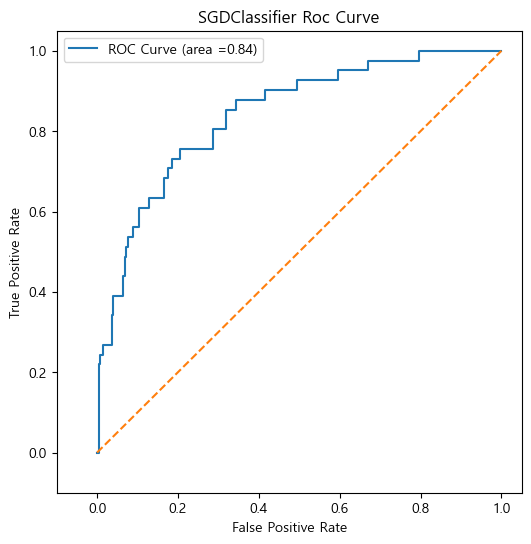

In [112]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC Curve (area =%.2f)'% roc_auc)
plt.plot([0,1],[0,1], linestyle ='--')
plt.ylim([-0.1, 1.05])
plt.xlim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGDClassifier Roc Curve')
plt.legend()
plt.show()

In [113]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [114]:
sgd_score

array([-3.86116554, -4.19330315, -4.87699332, -4.08634011, -5.57514877,
       -4.43152381, -2.69795788, -4.43646166, -5.09162498,  1.17346494,
       -4.96581959, -2.83211921, -4.42358307, -0.92482688, -3.80276484,
       -3.57998252, -4.45762914, -0.41577942, -3.7244941 , -1.11475479,
       -1.98760206,  0.0889597 , -3.86116554, -1.476464  , -0.38932605,
       -3.65522778, -2.69884502, -1.18551678, -3.08194041, -4.65213193,
       -3.99730208, -2.51682497, -3.98912533, -5.21729047, -2.6555859 ,
       -4.4803648 , -4.97583587, -6.90424126, -5.04010854, -3.81444204,
       -3.97109953, -4.05604116, -5.23024416, -0.1850063 , -4.35837166,
       -0.14260482, -4.83287185, -1.26914878, -2.65592909, -4.89304364,
       -3.70551283, -4.6293236 , -4.99618851, -0.81841441, -2.72929229,
       -5.2894213 , -5.40781458, -4.97011294, -4.41792582, -3.88623034,
       -3.03427862, -4.04692206, -3.5125132 , -5.99388948, -3.78191122,
       -4.24656269,  0.09797767, -2.60801611, -5.11145768, -4.29

### 이진분류 확률값 판단기준 : sigmoid(0과 1사이의 확률값이 0.5기준으로 분류)
### 이진분류 확률값 판단기준 : softmax(여러 카테고리별 확률값으로 분류 ), 즉 predict_proba에서 나온 예측값을 모두 양수화하고 더해서 나누면 카테고리의 확률값이 나옴
#### - 예) 카테고리가 4인경우 predict_proba(1 : -2.838, 2:0.283 , 3: 2.392, 4: 8.282)나온 값을 양수화하고 4개 카테고리값을 모두 더해서 각각을 나누면 확률값이 나오고
#### - 확률값이 가장 높은 카테고리를 분류값으로 예측함
---
## 특성공학
#### 차원축소 : 기존 특성중에 가장 영향력있는 특성을 분석하여 선택하고 대표성이 있다면 독립변수로 사용하는 기법으로 성능 저하가 거의 없이 차원의수를 축소
#### - 장점 : 학습속도가 빠르고 메모리사용량이 적으며 샘플의특징을 보기좋게 시각화
#### - 대표성이 높은 독립변수 : 종속변수에 상관성이 가장 높은 독립변수(상관관계) - selectpercentile함수로 확인

#### 주성분분석 : 여러 독립변수를 조합하여 대표할수 있는 새로운 특성을 찾아내는 방법